In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

In [2]:
# source data https://www.kaggle.com/datasets/datazng/telecom-company-churn-rate-call-center-data
df_raw=pd.read_csv("telecom_churn.csv")

# Source data initial EDA and cleaning

In [3]:
df_raw.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values for all columns.
However, TotalCharges is reported as object, which is wrong. Let's analyse


In [5]:
print(df_raw['TotalCharges'].str.contains('[a-zA-Z]').sum())
print(df_raw['TotalCharges'].isnull().sum())
print(df_raw['TotalCharges'].isna().sum())
print(df_raw['TotalCharges'].unique())


0
0
0
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [6]:
df_raw[df_raw['TotalCharges'].apply(pd.to_numeric, errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


There are 11 rows with unusual values in TotalCharges column that can't identified, but the values are converted to NaN by to_numeric function. 
Let's convert the values and then drop 11 records completely.

In [83]:
df=df_raw.copy()
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 23)

In [84]:
df.notnull().sum()
# so data is clean and no problem with missing values

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
numAdminTickets     7032
numTechTickets      7032
Churn               7032
dtype: int64

In [85]:
# Count number of full line duplicates
sum(df.duplicated())
# df[df.duplicated()==True]

0

No duplicates found

                                             | | [  0%]   00:00 -> (


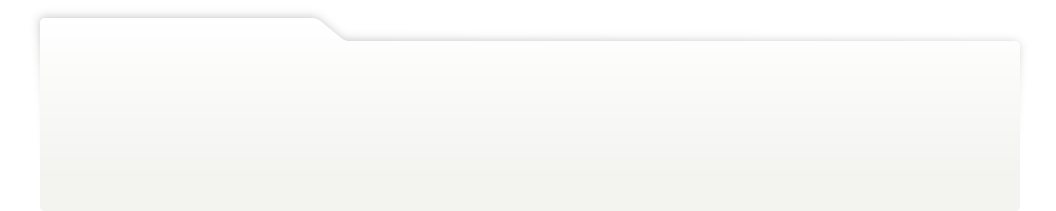
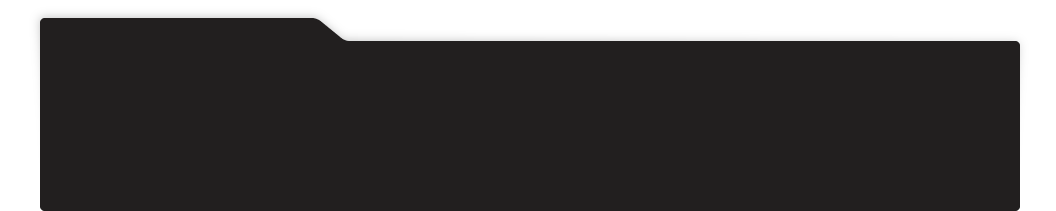
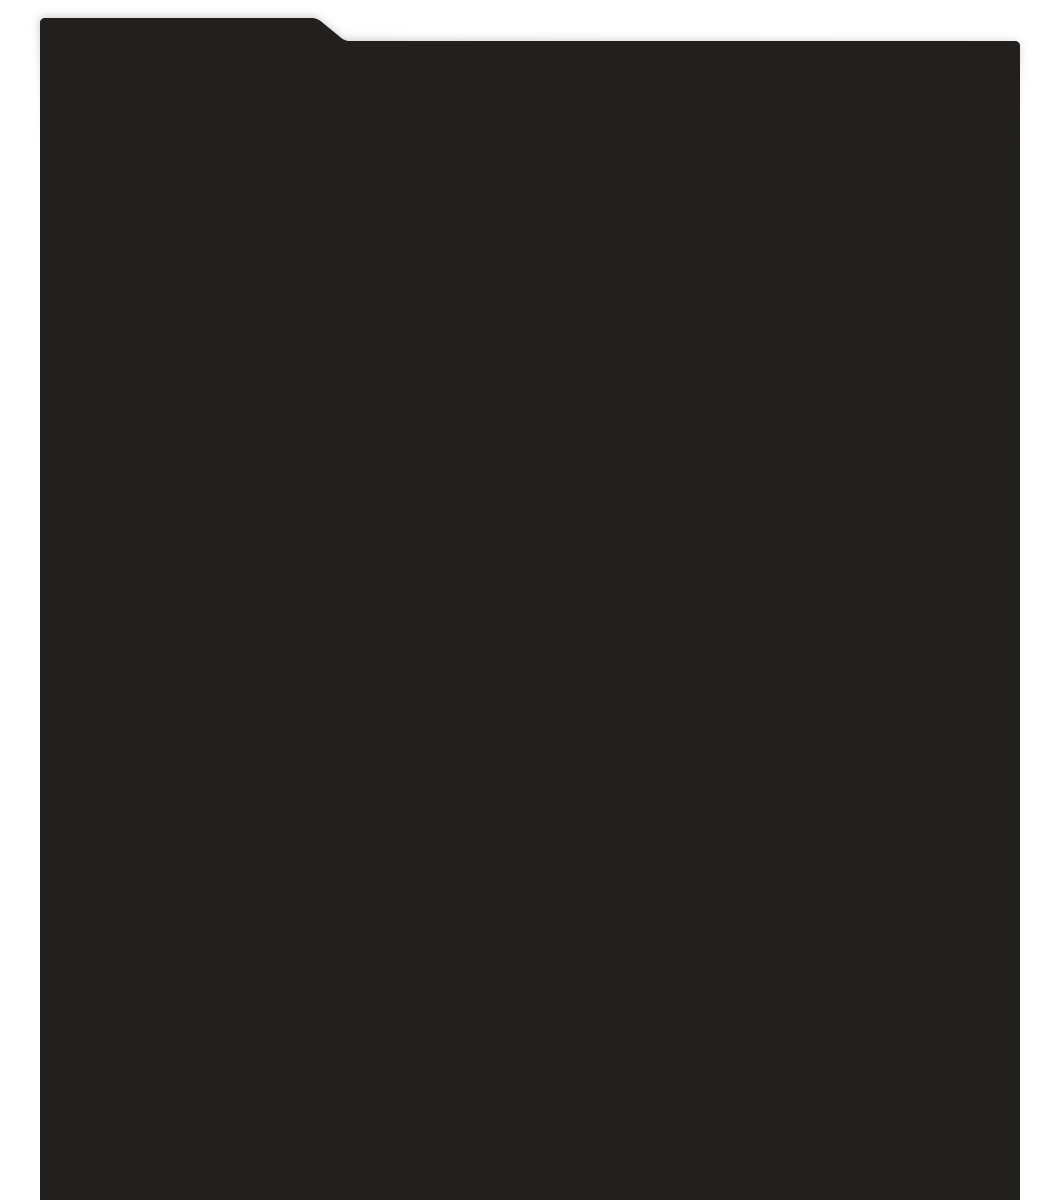
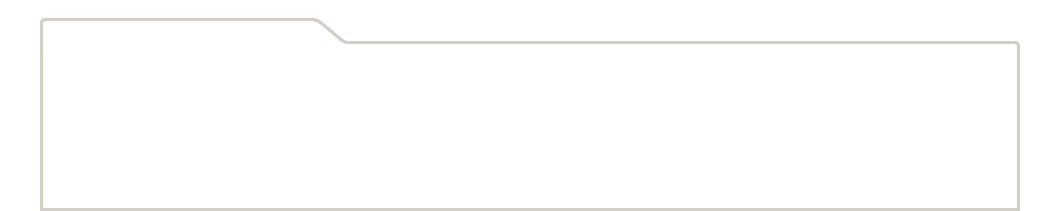
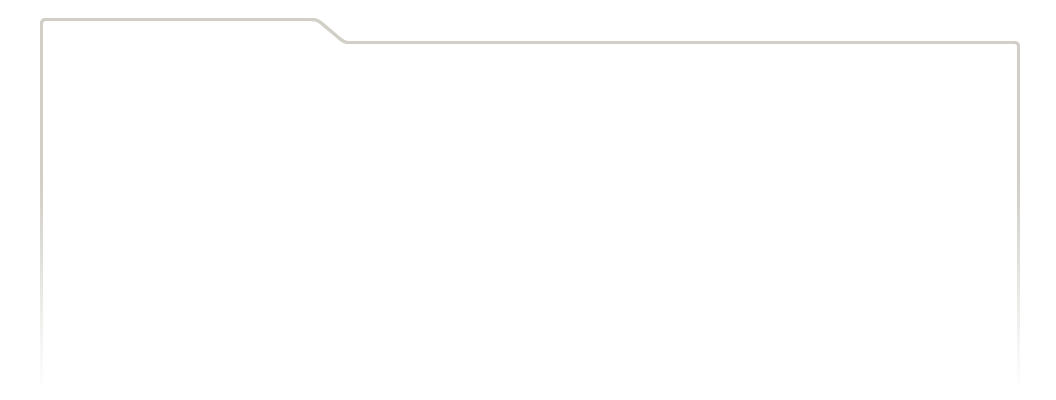
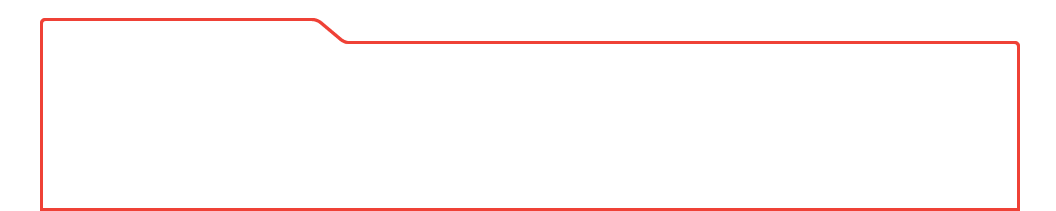
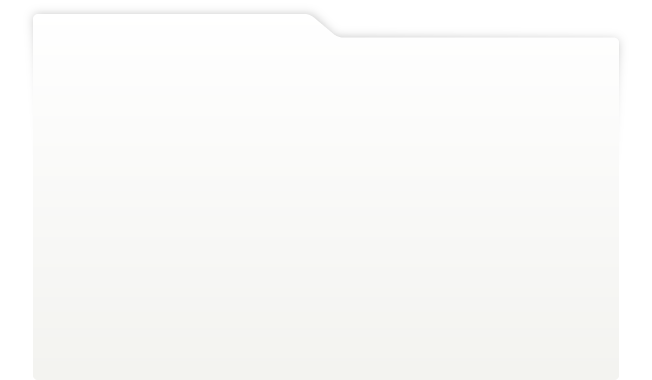
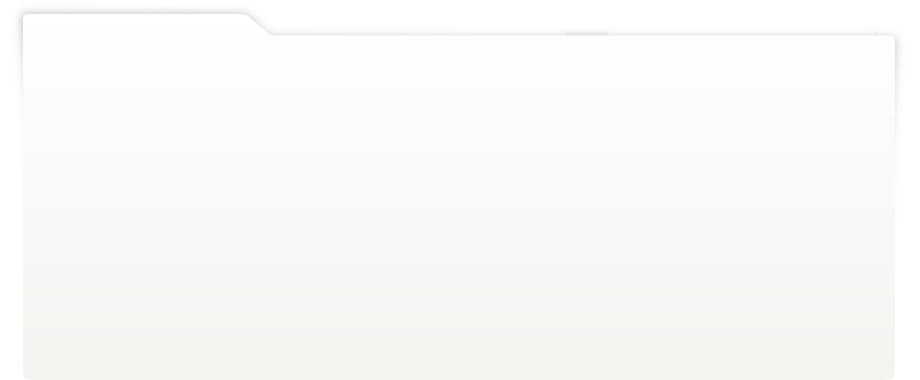
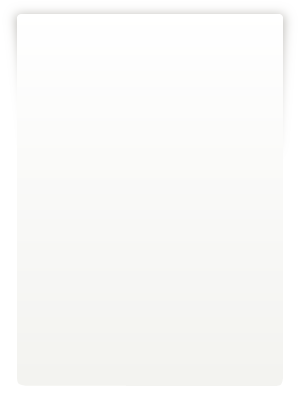
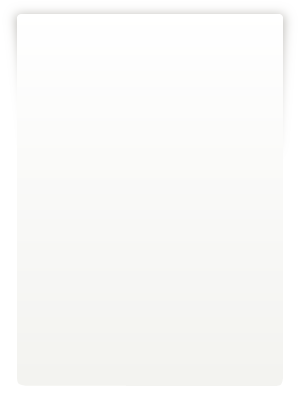
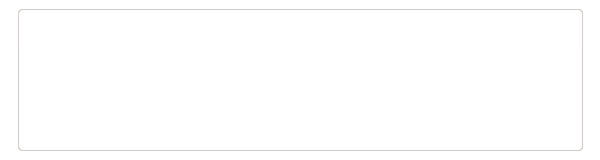
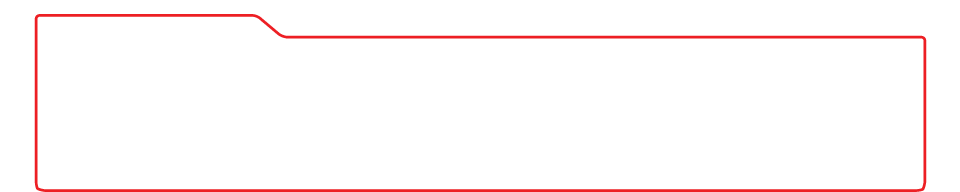
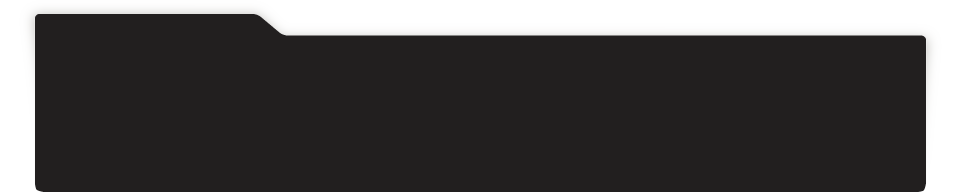
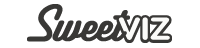
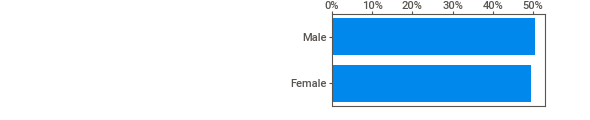
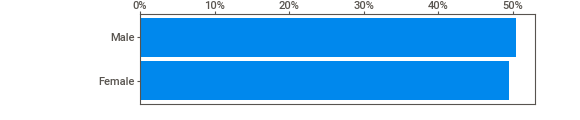
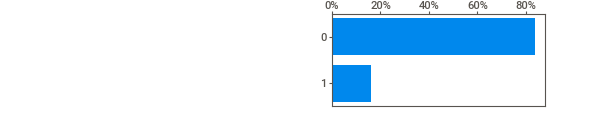
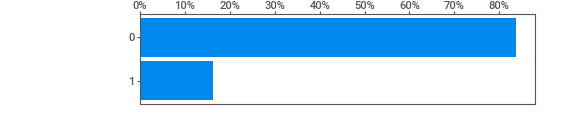
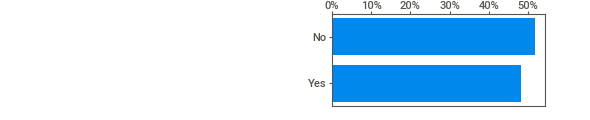
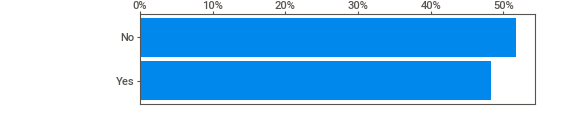
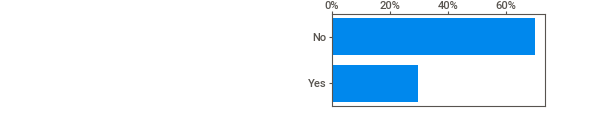
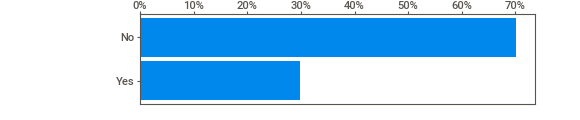
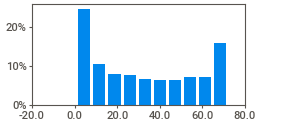
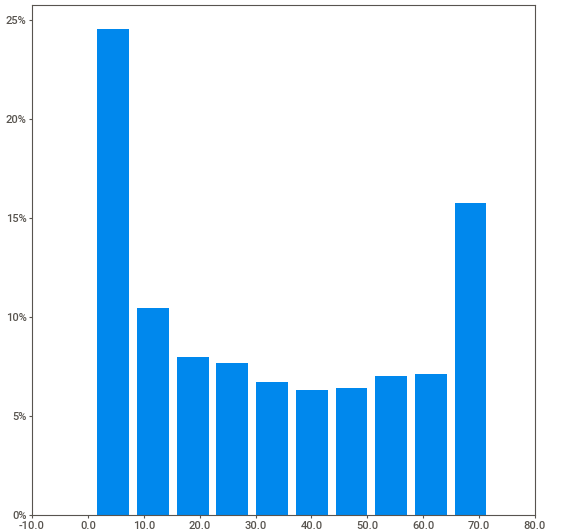
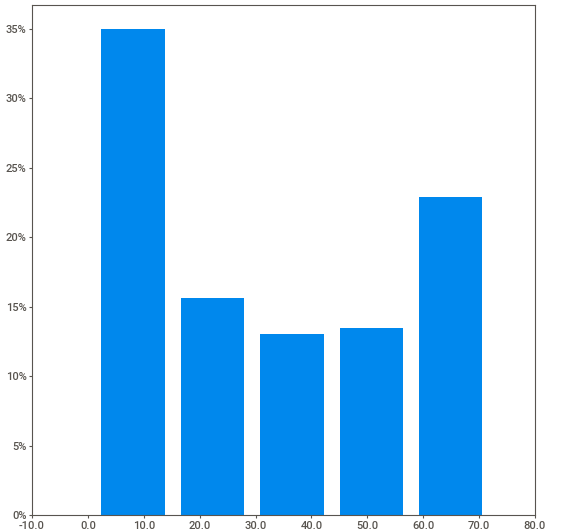
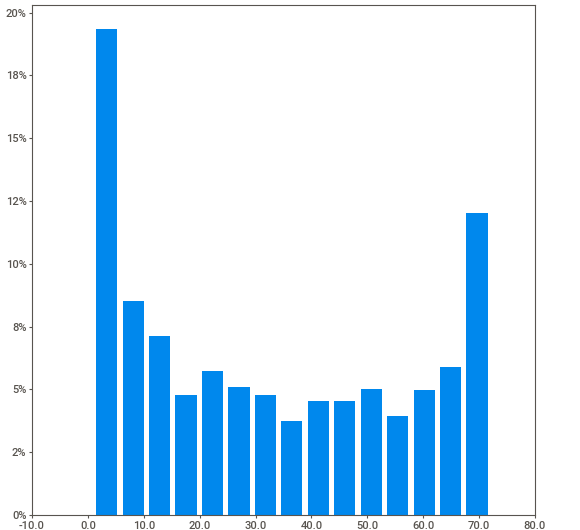
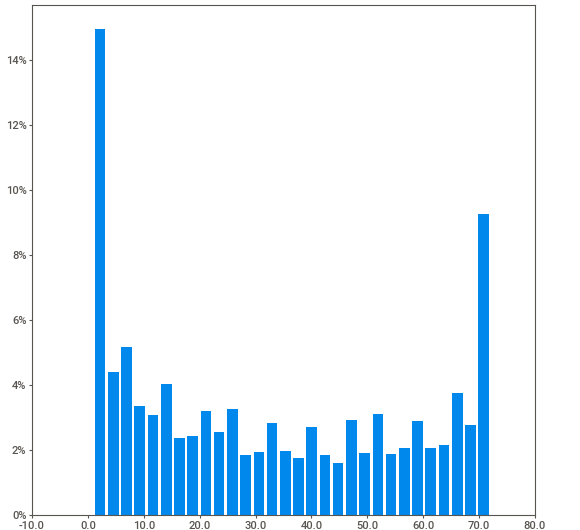
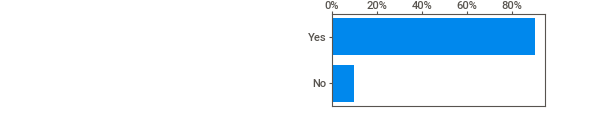
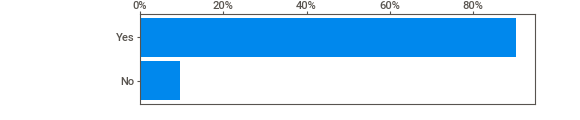
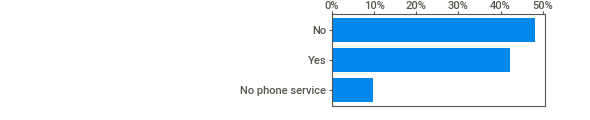
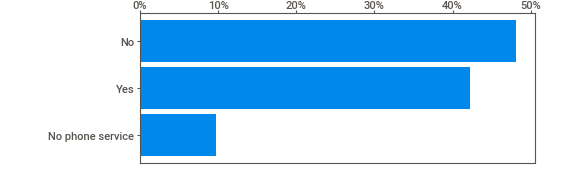
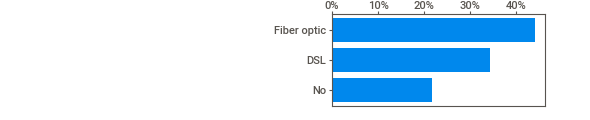
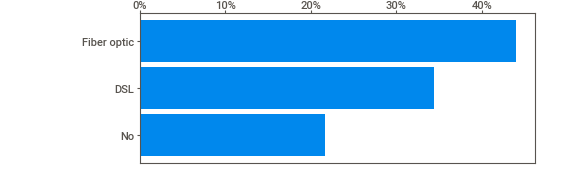
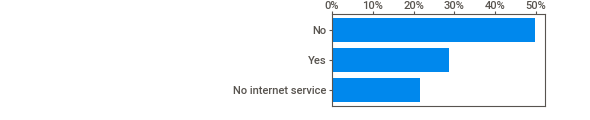
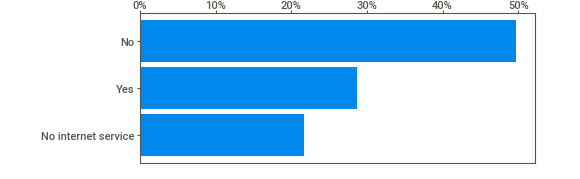
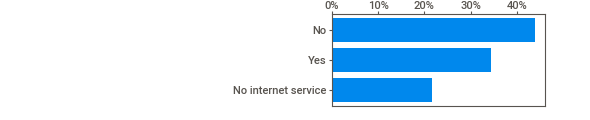
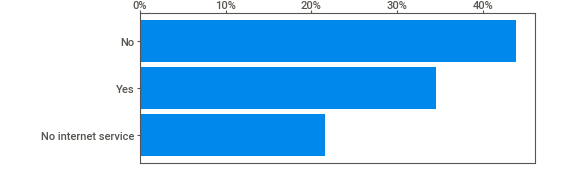
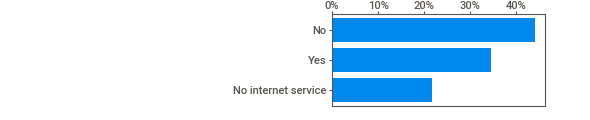
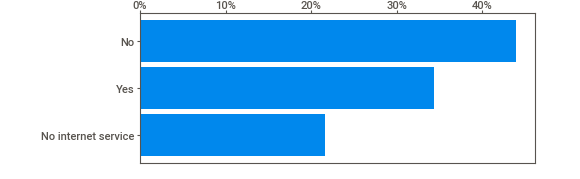
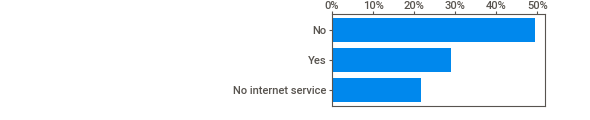
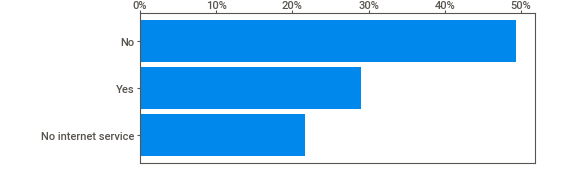
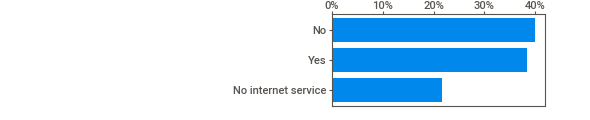
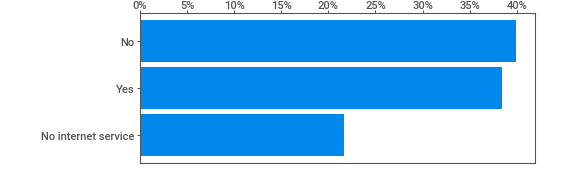
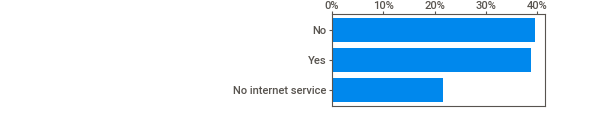
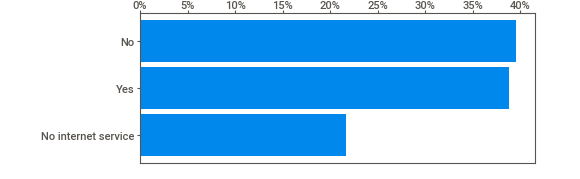
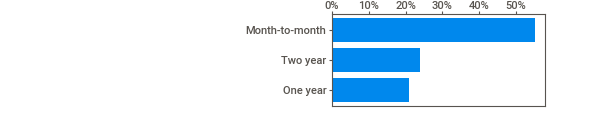
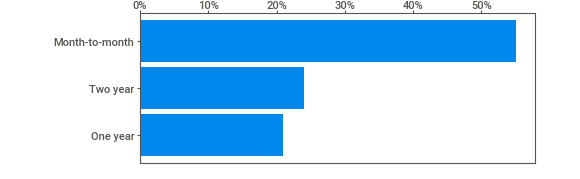
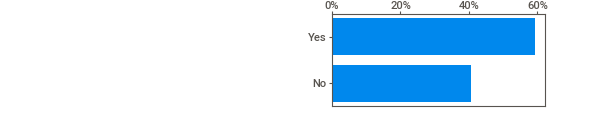
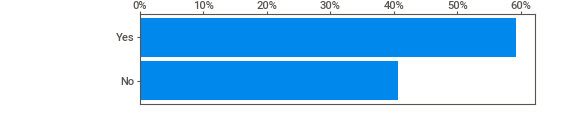
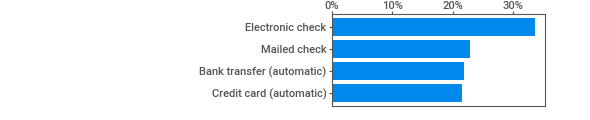
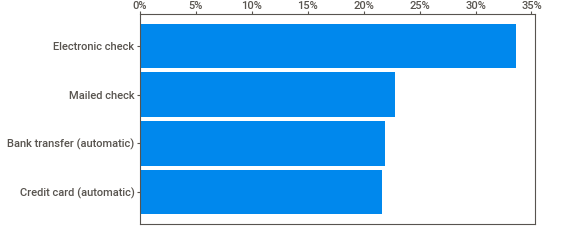
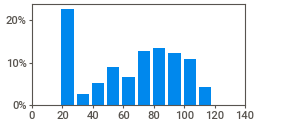
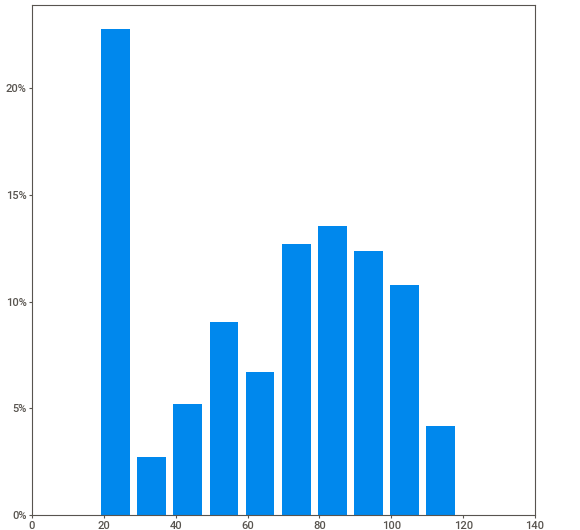
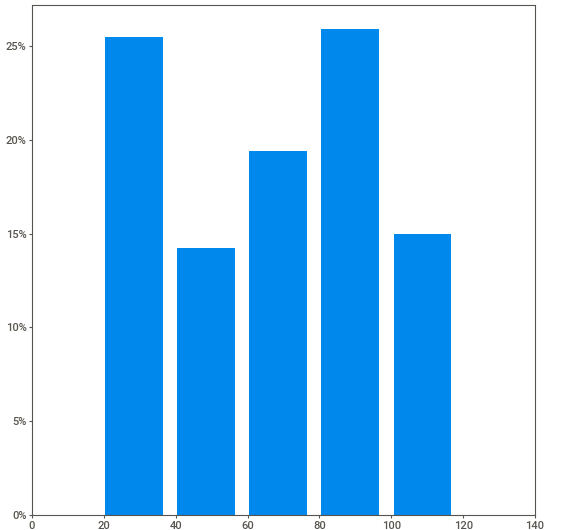
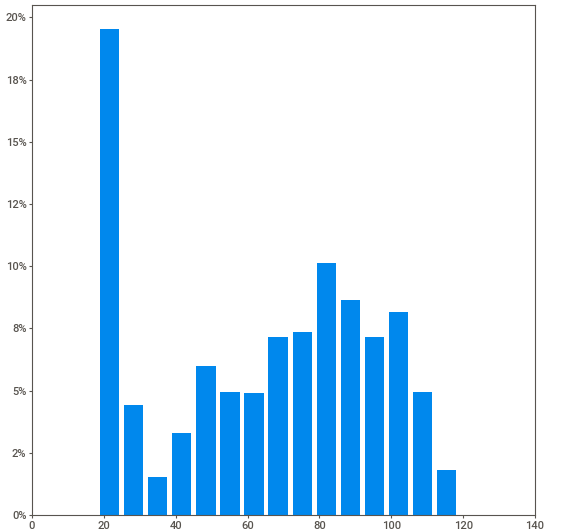
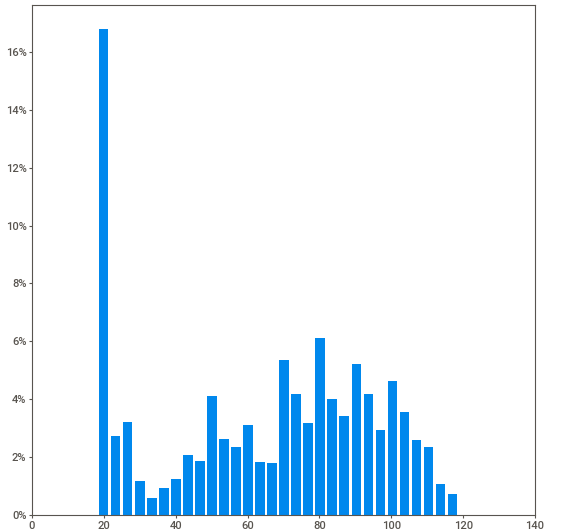
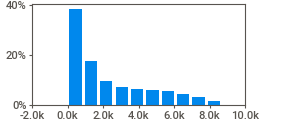
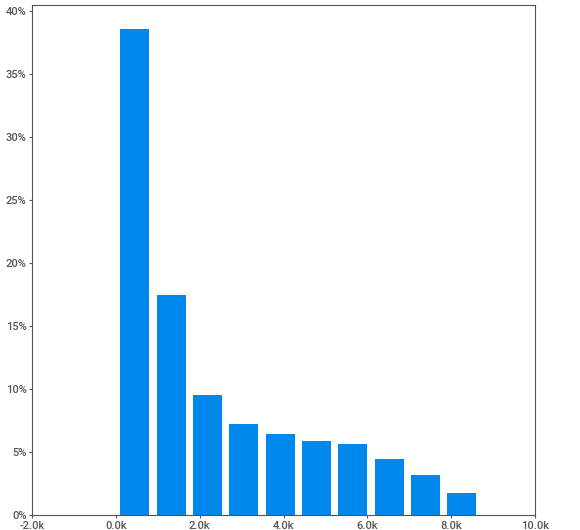
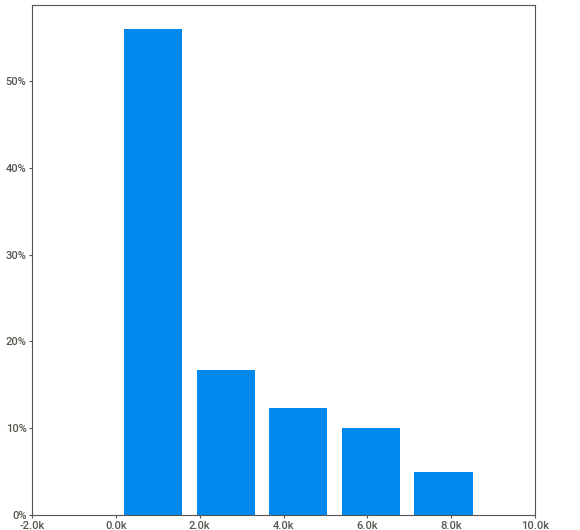
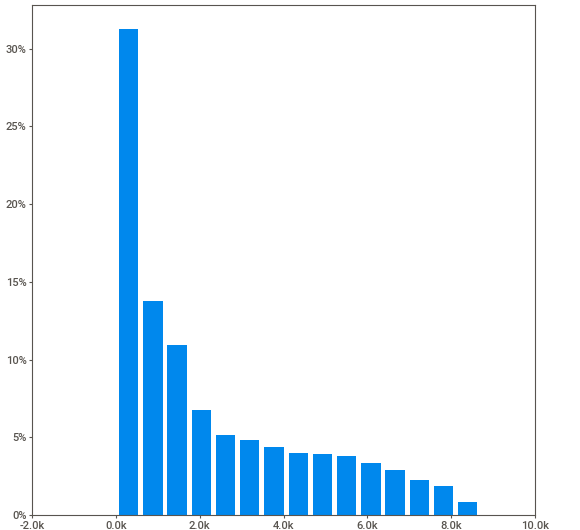
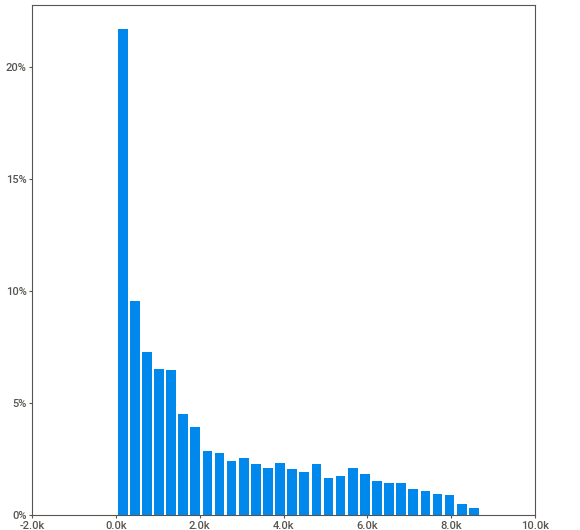
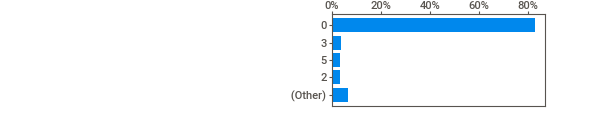
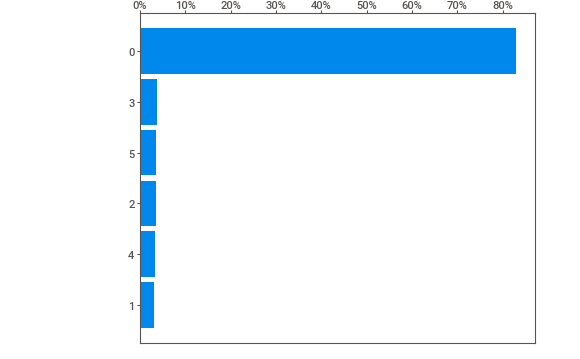
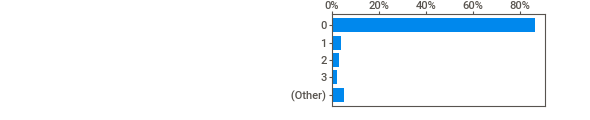
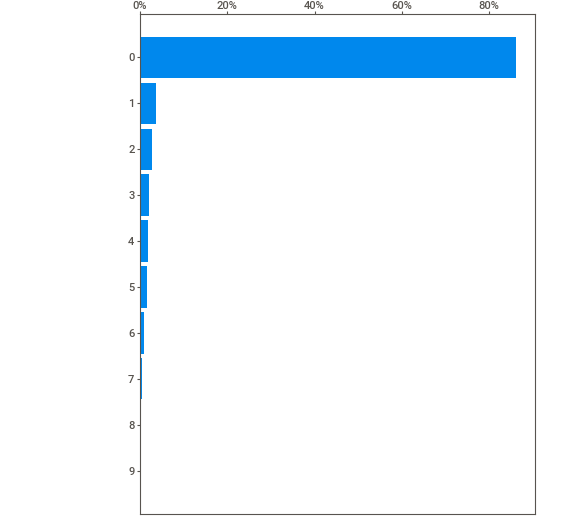
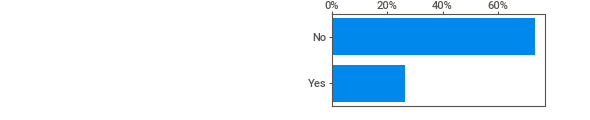
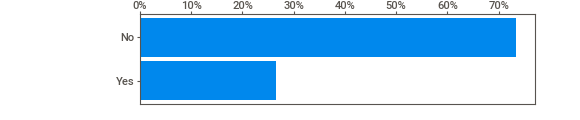
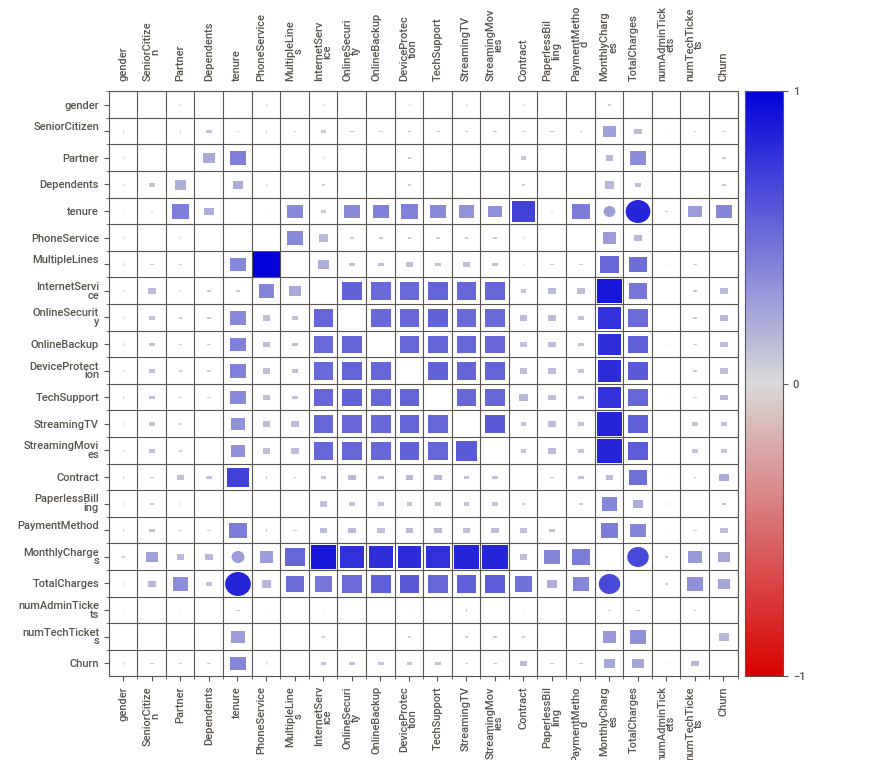
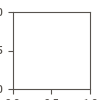

In [10]:
# let's look at variables' profiles
report = sv.analyze(df)

report.show_notebook()


# Data Preparation


In [86]:
# first of all let's drop customerID column that is useless for the prediction model
df=df.drop('customerID',axis=1)

In [87]:
# transforming categorical values to numeric ones: One-Hot encoding for PaymentMethod with multiple categories and LabelEncoding and mapping for ordinal or binary categories. 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Applying Label Enconding for the binary categorical columns
encoder = LabelEncoder()
#default mapping No-0,Yes-1; Female-0,Male-1
df['gender']=encoder.fit_transform(df['gender'])
df['Partner']=encoder.fit_transform(df['Partner'])
df['Dependents']=encoder.fit_transform(df['Dependents'])
df['PhoneService']=encoder.fit_transform(df['PhoneService'])
df['PaperlessBilling']=encoder.fit_transform(df['PaperlessBilling'])
df['Churn']=encoder.fit_transform(df['Churn'])

# explicit mapping
#df['Contract'] = df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
#df['InternetService'] = df['InternetService'].map({'No':0, 'DSL':1, 'Fiber optic':2})

df['StreamingMovies'] = df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':-1})
df['StreamingTV'] = df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':-1})
df['TechSupport'] = df['TechSupport'].map({'No':0,'Yes':1,'No internet service':-1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':-1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':-1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':-1})
df['MultipleLines'] = df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':-1})

In [88]:
# one hot encoding for PaymentMethod
PM_col=['PM_ElCheck','PM_MailCheck','PM_BankTransfer','PM_CreditCard']
encoder=OneHotEncoder(sparse_output=False,handle_unknown='error')
pm_encoded=encoder.fit_transform(df[['PaymentMethod']])
df=df.join(pd.DataFrame(pm_encoded,columns=PM_col))
#df.drop('PaymentMethod',axis=1,inplace=True)

# one hot encoding for Contract
Contract_col=['C_Month','C_1Year','C_2Years']
c_encoded=encoder.fit_transform(df[['Contract']])
df=df.join(pd.DataFrame(c_encoded,columns=Contract_col))
df.drop('C_Month',axis=1, inplace=True)

# one hot encoding for InternetService
IS_col=['IS_No','IS_DSL','IS_Fiber']
IS_encoded=encoder.fit_transform(df[['InternetService']])
df=df.join(pd.DataFrame(IS_encoded,columns=IS_col))
df.drop('IS_No',axis=1, inplace=True)

In [89]:
#let's check the data after the transformations
df.notnull().sum()

gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
numAdminTickets     7032
numTechTickets      7032
Churn               7032
PM_ElCheck          7021
PM_MailCheck        7021
PM_BankTransfer     7021
PM_CreditCard       7021
C_1Year             7021
C_2Years            7021
IS_DSL              7021
IS_Fiber            7021
dtype: int64

In [90]:
# newly created dummy columns have unexpected NaN values, let's investigate
df[df['PM_CreditCard'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,numTechTickets,Churn,PM_ElCheck,PM_MailCheck,PM_BankTransfer,PM_CreditCard,C_1Year,C_2Years,IS_DSL,IS_Fiber
7032,1,1,0,0,1,1,1,Fiber optic,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7033,1,0,0,0,38,1,0,Fiber optic,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7034,0,0,0,0,67,1,1,Fiber optic,1,1,...,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7035,1,0,0,0,19,1,0,Fiber optic,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7036,0,0,0,0,12,0,-1,DSL,0,1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7037,0,0,0,0,72,1,0,No,-1,-1,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7038,1,0,1,1,24,1,1,DSL,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,0,0,1,1,72,1,1,Fiber optic,0,1,...,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,0,0,1,1,11,0,-1,DSL,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,1,1,1,0,4,1,1,Fiber optic,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# I don't know what causes the issue with NaN values for these 11 records, the PaymentMethod values seems valid, I'll just drop the records with NaN values
df = df.dropna(subset=['PM_CreditCard'])
# PaymentMethod,InternetService and Contract can be dropped now
df.drop('PaymentMethod',axis=1,inplace=True)
df.drop('InternetService',axis=1,inplace=True)
df.drop('Contract',axis=1,inplace=True)


In [92]:
#let's check the data again
print(df.shape)
df.notnull().sum()

(7021, 27)


gender              7021
SeniorCitizen       7021
Partner             7021
Dependents          7021
tenure              7021
PhoneService        7021
MultipleLines       7021
OnlineSecurity      7021
OnlineBackup        7021
DeviceProtection    7021
TechSupport         7021
StreamingTV         7021
StreamingMovies     7021
PaperlessBilling    7021
MonthlyCharges      7021
TotalCharges        7021
numAdminTickets     7021
numTechTickets      7021
Churn               7021
PM_ElCheck          7021
PM_MailCheck        7021
PM_BankTransfer     7021
PM_CreditCard       7021
C_1Year             7021
C_2Years            7021
IS_DSL              7021
IS_Fiber            7021
dtype: int64

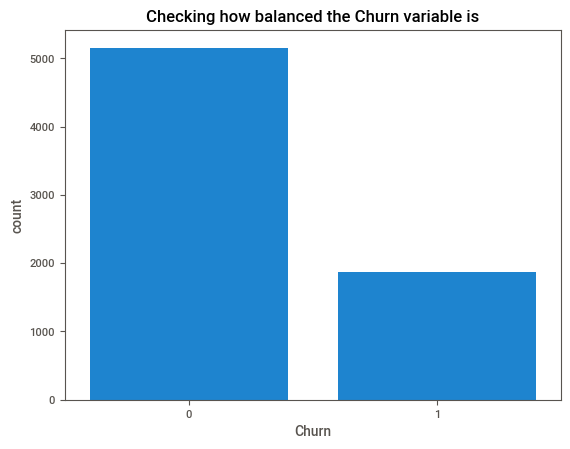

In [93]:
# Is the dataset unbalanced?

g = sns.countplot(data=df, x='Churn')
g.set(title='Checking how balanced the Churn variable is')
plt.show()

# The plot below is a bit unbalanced but not extremely so - around 30% of customers have been churned. We should be ok to proceed

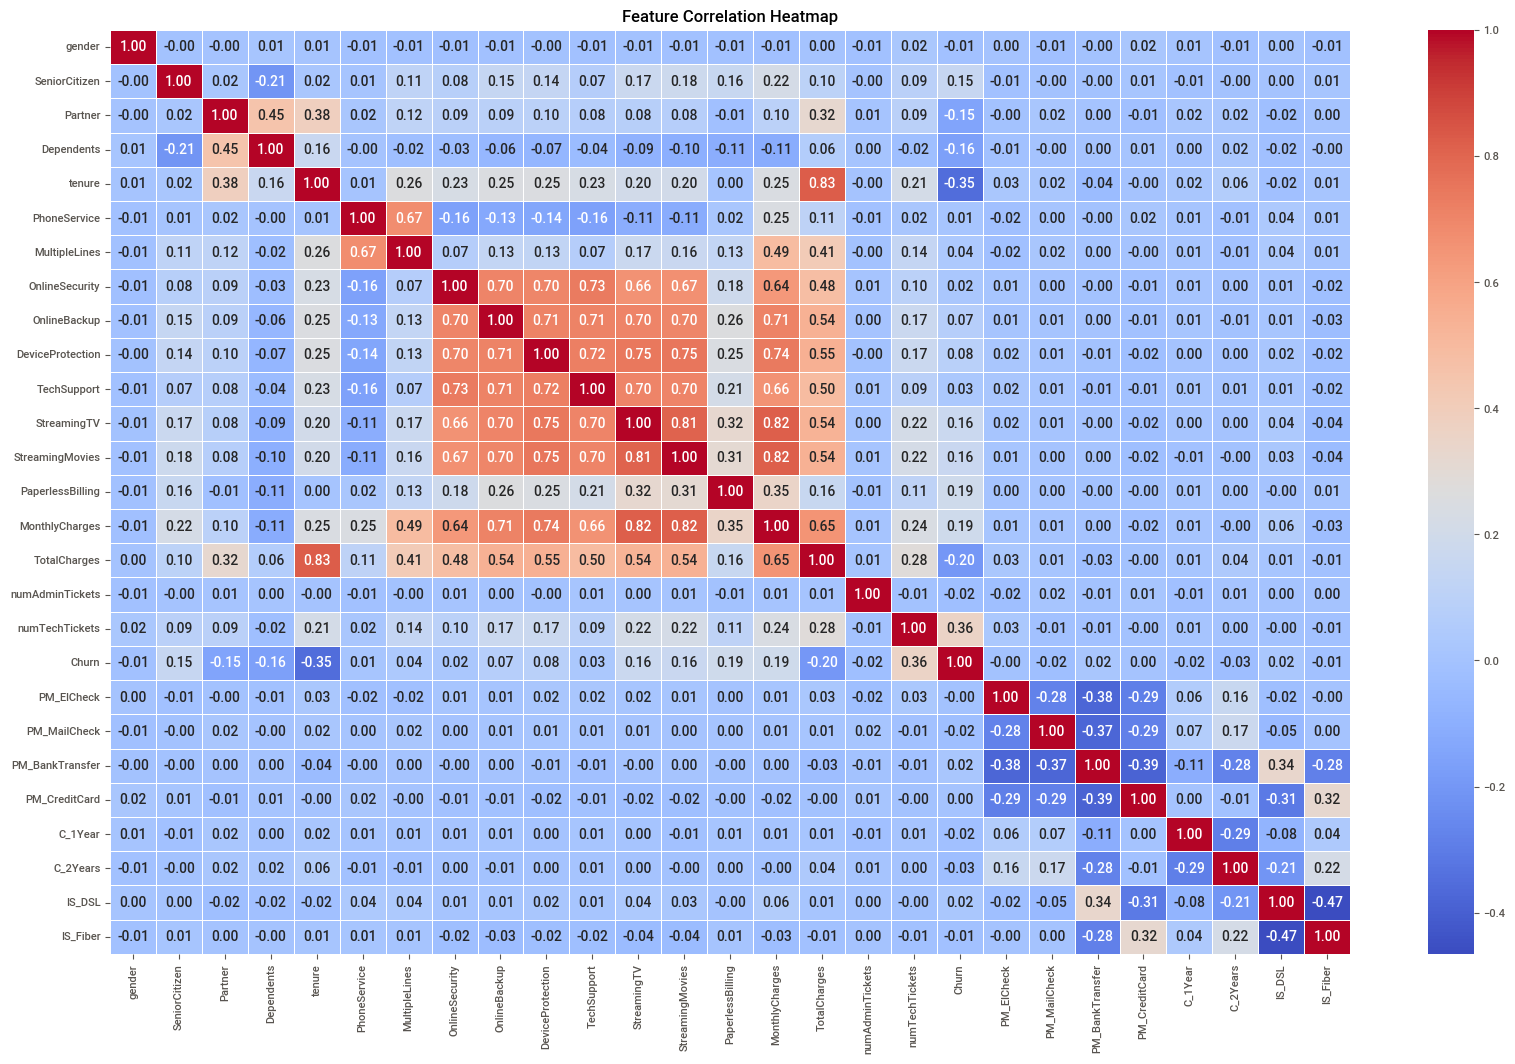

In [94]:
# check the correlation matrix again after the encoding

correlation_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

There are is a correlated pair of variables - InternetService/MonthlyCharges - and a few less correlated pairs: StreamingTV/MonthlyCharges, StreamingMovies/MonthlyCharges, Contract/Tenure, StreamingTV/StreamingMovies. All of them make sense to keep for the further feature importance testing. 
A high correlation between TotalCharges and Tenure requires an investiagation too.
The Contract/Tenure pair looks suspicious and a candidate on a removal of one of them, but it will be clear on the feature importance test.

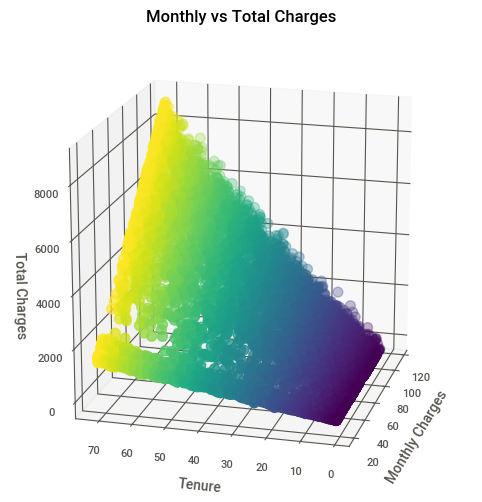

In [95]:
#analysing the correlation between TotalCahrges, MonthlyCharges and Tenure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df['MonthlyCharges'], df['tenure'], df['TotalCharges'], c=df['tenure'], cmap='viridis', marker='o', s=50)
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Tenure')
ax.set_zlabel('Total Charges')
ax.set_title('Monthly vs Total Charges')

ax.set_box_aspect([1,1,1])  # Forces a cubic box to avoid distortion

# Adjusting the view to clearly see the alignment
ax.view_init(elev=18, azim=195)
plt.show()


In [96]:
# There is a dependancy between Total and Monthly Charges, therefore, I'll drop Total Charges.
df.drop('TotalCharges',axis=1, inplace=True)

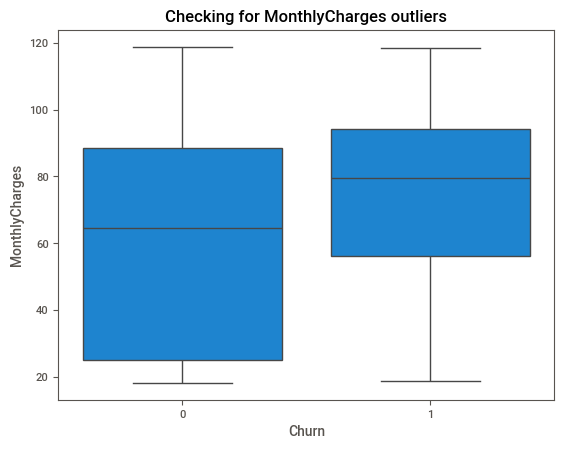

In [97]:
sns.boxplot(df, y='MonthlyCharges',x='Churn')
plt.title('Checking for MonthlyCharges outliers')
plt.show()
#it doesn't seem that there are outliers in our dataset based on the mon thly charges.

In [98]:
#the result dataset (before any feature analysis)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   OnlineSecurity    7021 non-null   int64  
 8   OnlineBackup      7021 non-null   int64  
 9   DeviceProtection  7021 non-null   int64  
 10  TechSupport       7021 non-null   int64  
 11  StreamingTV       7021 non-null   int64  
 12  StreamingMovies   7021 non-null   int64  
 13  PaperlessBilling  7021 non-null   int64  
 14  MonthlyCharges    7021 non-null   float64
 15  numAdminTickets   7021 non-null   int64  
 16  numTechTickets    7021 non-null   int64  


In [99]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,numTechTickets,Churn,PM_ElCheck,PM_MailCheck,PM_BankTransfer,PM_CreditCard,C_1Year,C_2Years,IS_DSL,IS_Fiber
0,0,0,1,0,1,0,-1,0,1,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,34,1,0,1,0,1,...,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,0,0,45,0,-1,1,0,1,...,3,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Train and test dataset preparation

In [100]:
# let's prepare our dataset for the modelling
X=df.copy()
print(X.shape)
y=X.pop('Churn')
print(X.shape)
print(y.shape)

(7021, 26)
(7021, 25)
(7021,)


In [101]:
# scalling the data
from sklearn.preprocessing import StandardScaler
col=X.columns
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [102]:
# Train test split for the scaled dataset
from sklearn.model_selection import train_test_split

# We have retained 20% of the data for the test set
# Using Stratify option, we ensure tha same ratio of Churn outcome in both trainging and test sets  
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1, stratify=df['Churn'])


In [103]:
print(X_train.shape)
print(X_test.shape)


(5616, 25)
(1405, 25)


# Model fitting

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

#X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1, stratify=df['Churn'])

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [105]:
# Metrics for the Model that uses unscaled data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

accuracy = met.accuracy_score(y_test, y_pred)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred)

print("Accuracy stats for Logistic Regression model:")
print("Accuracy:", np.round(accuracy*100.0,2))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2)) # Average of sensitivity and specificity (V useful when unbalanced)

print("F1-score: ", np.round(f1*100.0,2)) # F1 score doesn't care about how many true negatives are being classified

Accuracy stats for Logistic Regression model:
Accuracy: 85.62
Balanced Accuracy: 79.6
F1-score:  71.14


In [107]:
#defining a function to plot ROC curve and conusion matrix for a model output
def plot_roc_cm(y_true, y_pred, model, name):
    # compute fpr and tpr for roc curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # compute the confusion matrix
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)
    mat = confusion_matrix(y_true, y_pred_binary)
    cr = classification_report(y_true, y_pred_binary)
    print(cr)

    # plot the ROC curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    ax1.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve of {}'.format(name))
    ax1.legend(loc='lower right')

    # plot the confusion matrix
    names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
    percents = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
    labels = ["{}\n{}\n{}".format(a, b, c) for a, b, c in zip(names, counts, percents)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(mat, annot=labels, fmt="", cmap="Blues", ax=ax2)
    ax2.set(xlabel="Predicted", ylabel="Actual",
       title='Confusion Matrix of {}'.format(name))

    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1032
           1       0.76      0.67      0.71       373

    accuracy                           0.86      1405
   macro avg       0.82      0.80      0.81      1405
weighted avg       0.85      0.86      0.85      1405



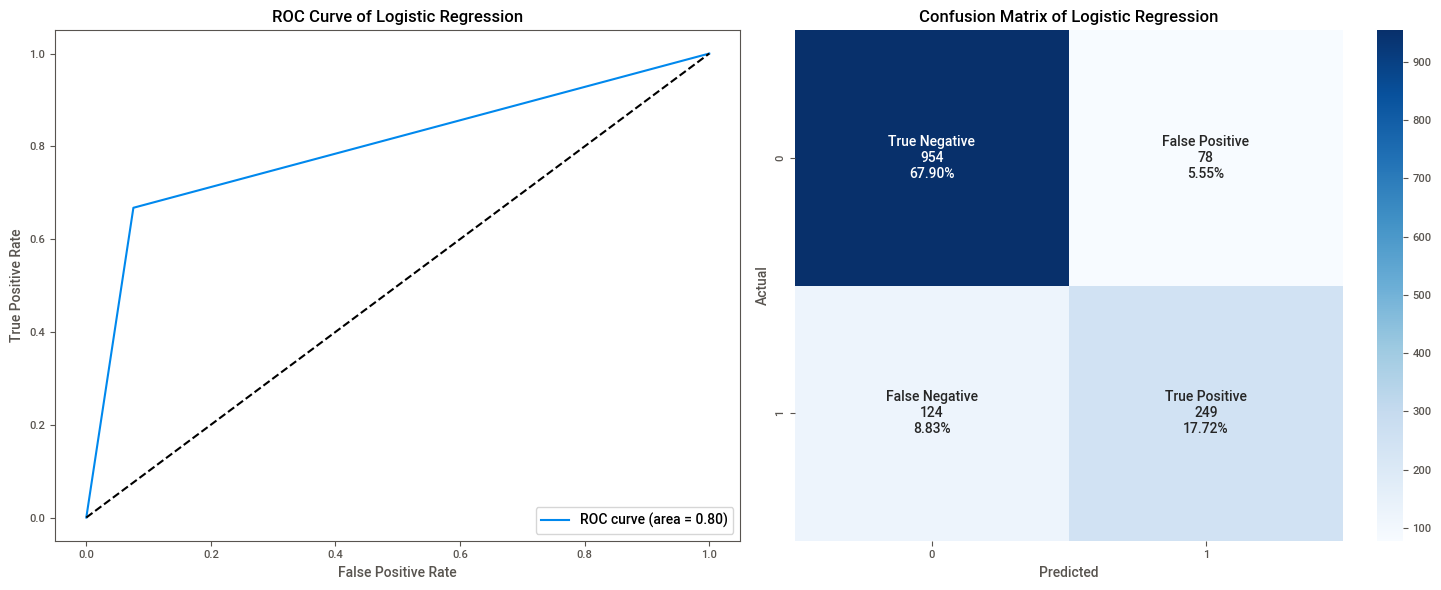

In [108]:
plot_roc_cm(y_test, y_pred, model, 'Logistic Regression')

# Result interpretation


#### The model is better at identifying non-churned customers then churned: 92% vs 67% recall rate with better precision 88% vs 76%.
#### From business perspective, it'd be more beneficial to have it other way round and get better performance for the churned customer prediction.

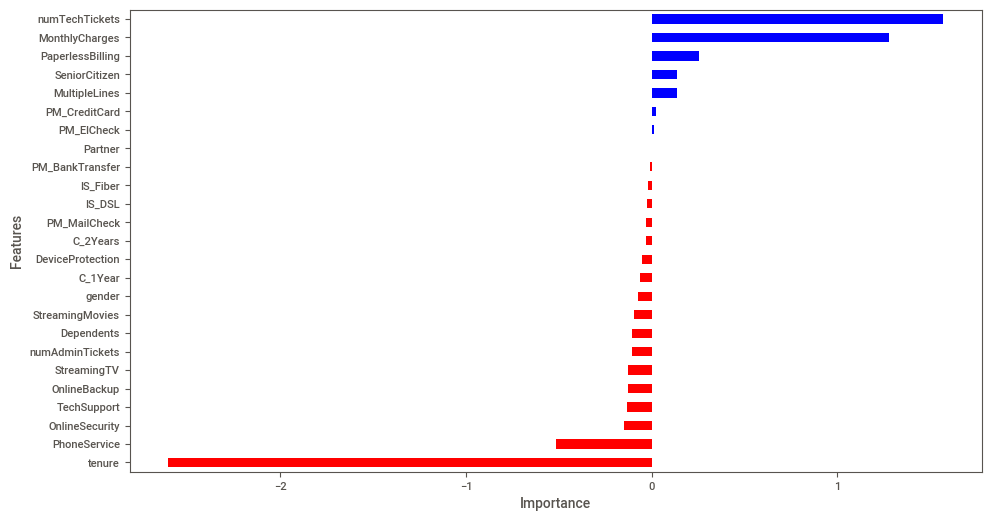

In [109]:
# analysis of features' importance
coeff = list(model.coef_[0])
labels = list(X.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

#### The features having the most impact are: numTechTickets, MonthlyCharges, tenure and Phone Service. 
#### PaymentMethod-derived features (PM_XXX) have almost zero importance, hence, they can be removed. The same valid for Partner and InternetService-derived columns (IS_DSL,IS_Fiber)

## Recommendations
To impove the churn detection, there are a few options to consider:
- give a try to other classifiers
- adjust the decision threshold
- reduce the number of features in order to get a better generalisation

## Reducing the number of features

In order to improve the model performance, a few features will be removed and the model refitted.  
The features for removal are: PM_CreditCard, PM_ElCheck, PM_BankTransfer, PM_MailCheck, Partner, IS_Fiber, IS_DSL
    

In [110]:
X=df.copy()
X.drop(columns=['PM_CreditCard', 'PM_ElCheck', 'PM_BankTransfer', 'PM_MailCheck', 'Partner', 'IS_Fiber', 'IS_DSL'], inplace=True)
y=X.pop('Churn')
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1, stratify=df['Churn'])

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1032
           1       0.76      0.67      0.71       373

    accuracy                           0.86      1405
   macro avg       0.82      0.80      0.81      1405
weighted avg       0.85      0.86      0.85      1405



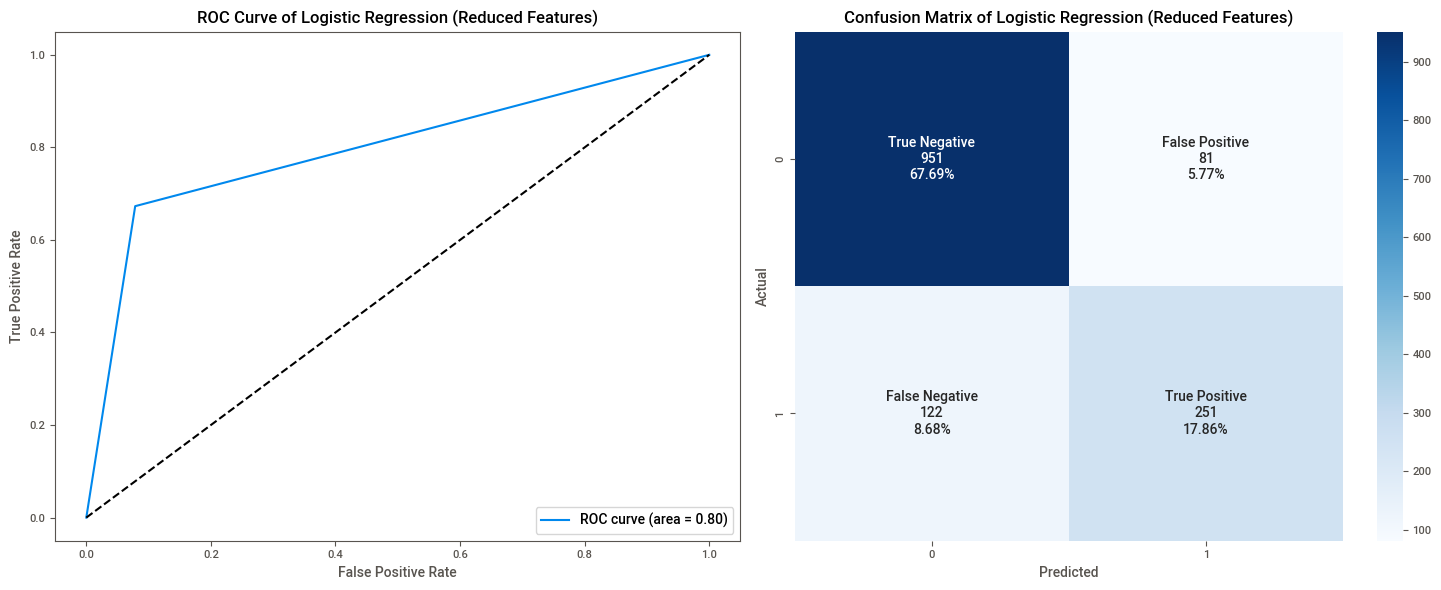

In [73]:
plot_roc_cm(y_test, y_pred, model, 'Logistic Regression (Reduced Features)')

#### The new model shows almost no changes in the performance metric: overall accuracy and recall are the same, the precision droped slightly.
#### No reason to change the features. 

## Analysing different models

In [111]:
# reset the train/test datasets
X=df.copy()
y=X.pop('Churn')
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1, stratify=df['Churn'])

In [112]:
from lazypredict.Supervised import LazyClassifier

# load the lazyclassifier engine - specify settings
classifier = LazyClassifier(verbose=0, ignore_warnings=True,
                     custom_metric=None, predictions=True)

# run the lazyclassifier engine
models, predictions = classifier.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████| 29/29 [00:06<00:00,  4.79it/s]

[LightGBM] [Info] Number of positive: 1493, number of negative: 4123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 5616, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265848 -> initscore=-1.015794
[LightGBM] [Info] Start training from score -1.015794


In [113]:
models.sort_values(by=['F1 Score','Balanced Accuracy'], ascending=False, axis=0)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.87,0.81,0.81,0.86,0.09
LGBMClassifier,0.86,0.81,0.81,0.86,0.08
RandomForestClassifier,0.86,0.80,0.80,0.86,0.45
AdaBoostClassifier,0.86,0.81,0.81,0.86,0.21
ExtraTreesClassifier,0.86,0.80,0.80,0.86,0.47
LinearSVC,0.86,0.80,0.80,0.85,0.44
LogisticRegression,0.86,0.80,0.80,0.85,0.03
CalibratedClassifierCV,0.86,0.80,0.80,0.85,0.09
SVC,0.85,0.79,0.79,0.85,0.93


#### The logistic regression algorithm holds very well against more advanced models, having one of the best running times (0.03s). It makes it a strong choice. XGBClassifier model might give slightly better performance, but with a higher copmutation cost.

## Adjusting threshold

In [189]:
X=df.copy()
y=X.pop('Churn')
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1, stratify=df['Churn'])

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

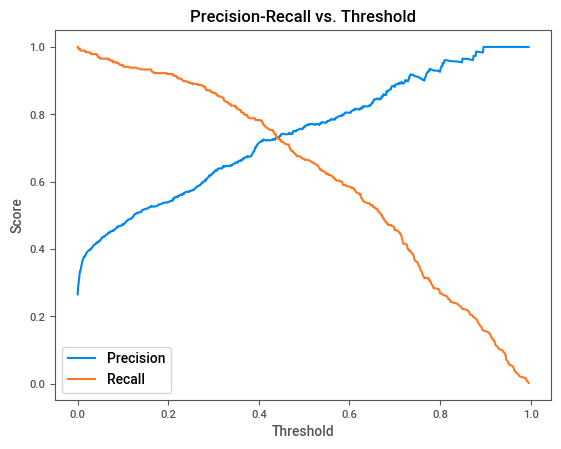

In [190]:
from sklearn.metrics import precision_recall_curve

y_probs = model.predict_proba(X_test)[:, 1] 

# Compute precision-recall values for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Tradeoff
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()

In [191]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[f1_scores[:-1].argmax()]
print("Best Threshold:", best_threshold)

Best Threshold: 0.40709694204979247


In [192]:
new_threshold= 0.44 #best_threshold
y_pred_new = (y_probs >= new_threshold).astype(int)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1032
           1       0.73      0.73      0.73       373

    accuracy                           0.86      1405
   macro avg       0.82      0.82      0.82      1405
weighted avg       0.86      0.86      0.86      1405



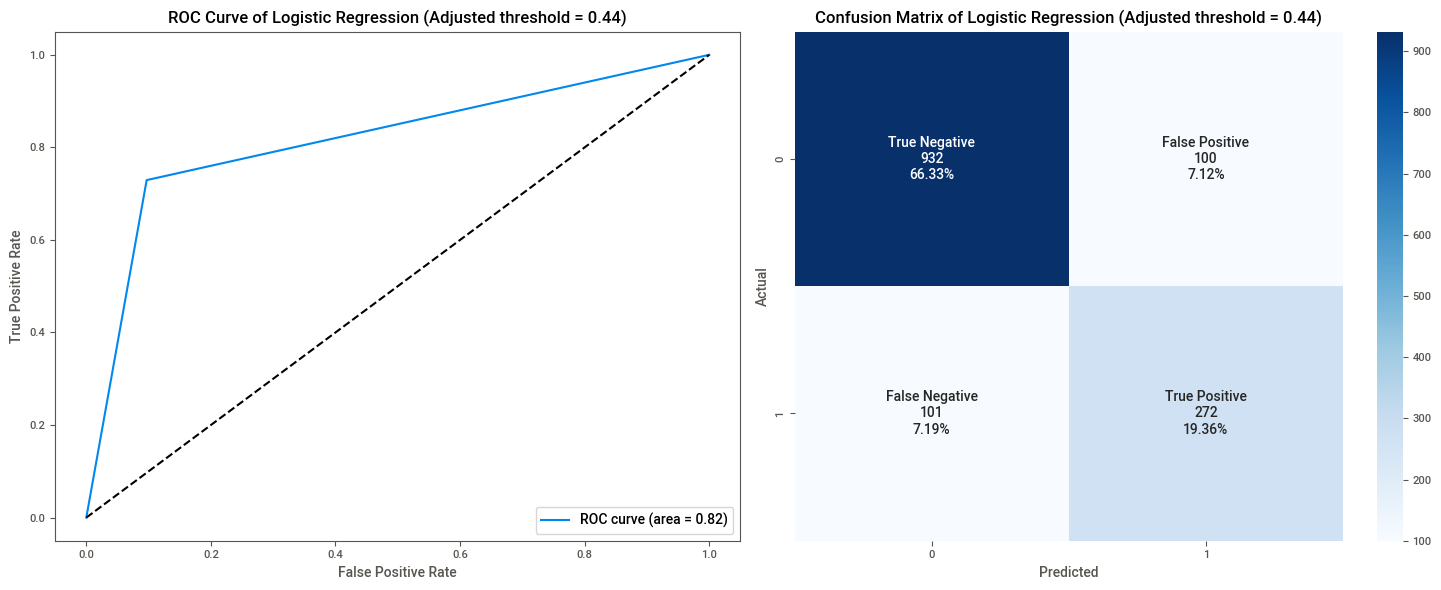

In [193]:
# ROC and CM for the new threshold model
plot_roc_cm(y_test, y_pred_new, model, f"Logistic Regression (Adjusted threshold = {new_threshold:.2f})")

#### The adjusted threshold (0.44 vs. the default 0.5) increased the recall for churned customers from 0.67 to 0.73, though precision declined from 0.76 to 0.73. For non-churned customers, recall slightly dropped from 0.91 to 0.90, while precision improved from 0.89 to 0.90.  ROC curve area has improved too from 0.8 to 0.82.

#### The final model will use the adjusted threshold.


## Class Weight Adjustment

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1032
           1       0.73      0.73      0.73       373

    accuracy                           0.86      1405
   macro avg       0.82      0.82      0.82      1405
weighted avg       0.86      0.86      0.86      1405



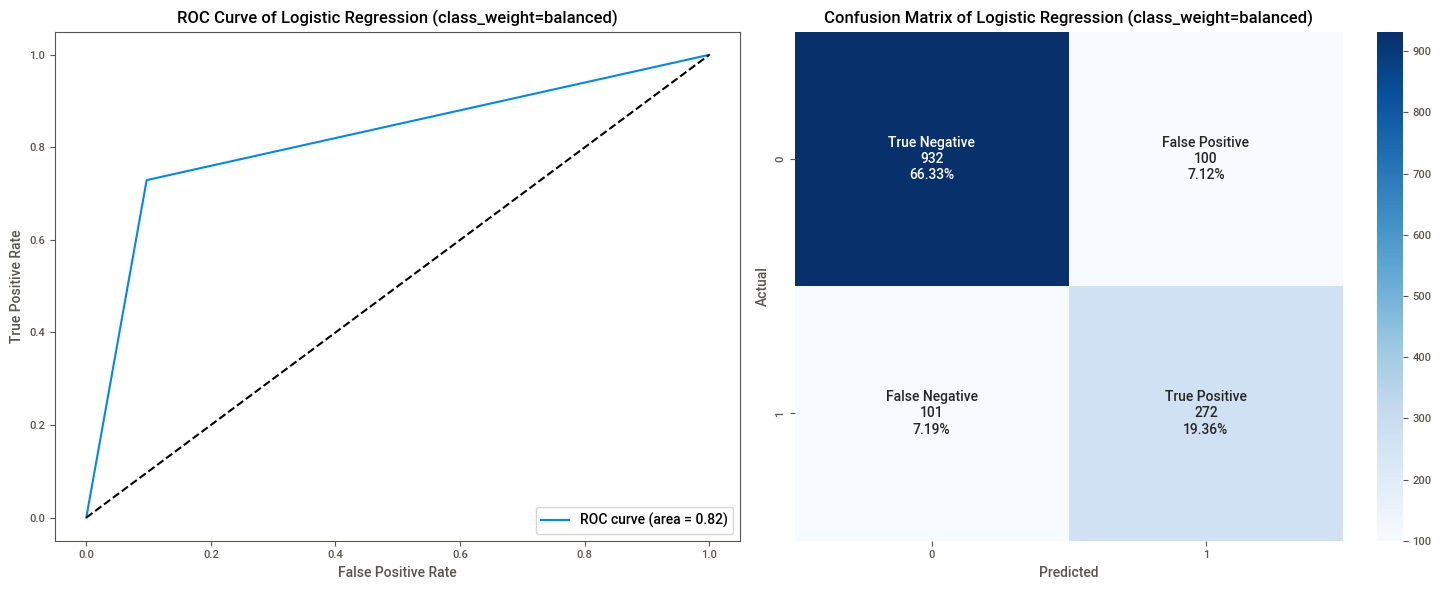

In [194]:
X=df.copy()
y=X.pop('Churn')
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1, stratify=df['Churn'])

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plot_roc_cm(y_test, y_pred_new, model, f"Logistic Regression (class_weight=balanced)")

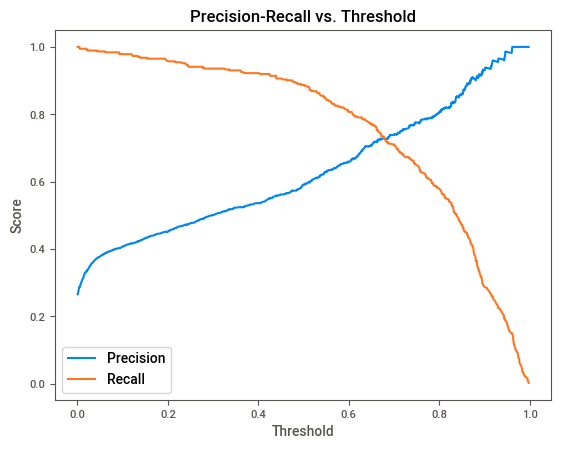

In [195]:

y_probs = model.predict_proba(X_test)[:, 1] 

# Compute precision-recall values for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Tradeoff
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()

In [196]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[f1_scores[:-1].argmax()]
print("Best Threshold:", best_threshold)

Best Threshold: 0.636065030203641


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1032
           1       0.70      0.78      0.74       373

    accuracy                           0.85      1405
   macro avg       0.81      0.83      0.82      1405
weighted avg       0.86      0.85      0.86      1405



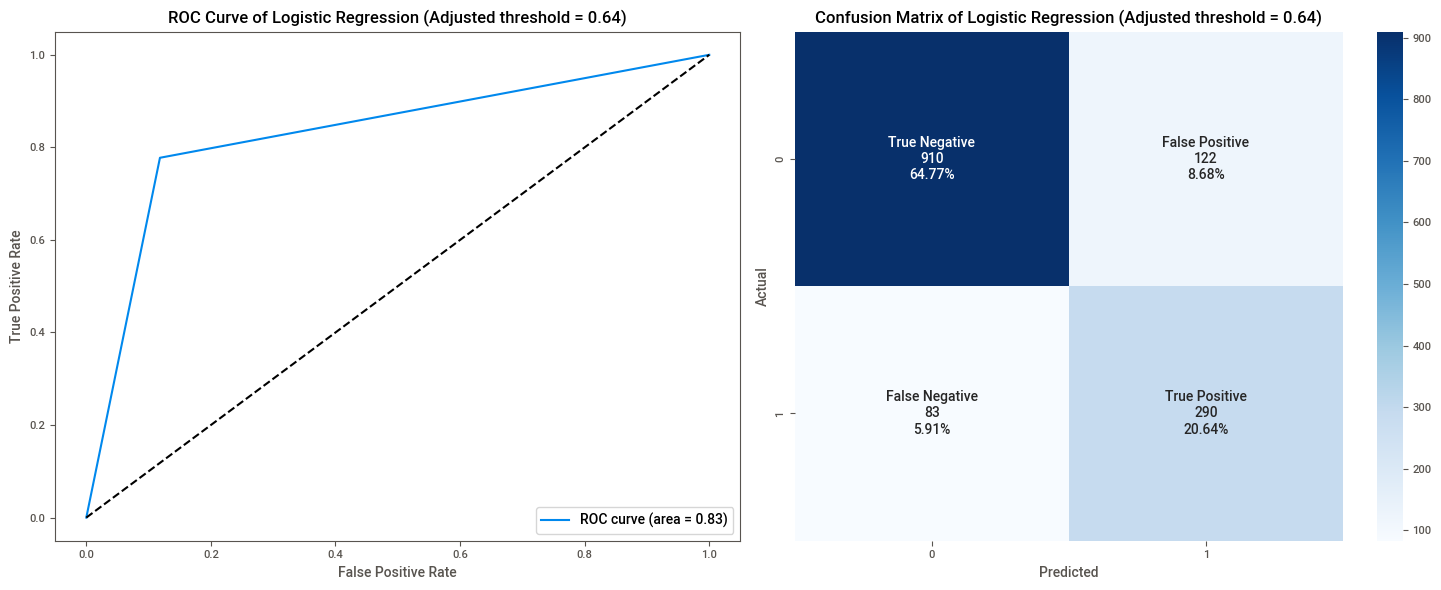

In [203]:
new_threshold= 0.64 #best_threshold
y_pred_new = (y_probs >= new_threshold).astype(int)
# ROC and CM for the new threshold model with balanced weight 
plot_roc_cm(y_test, y_pred_new, model, f"Logistic Regression (Adjusted threshold = {new_threshold:.2f})")